# **Data Analysis**

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [225]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/housing.csv')

In [226]:
df.shape

(20640, 10)

In [227]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [228]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [229]:
df.shape

(20640, 10)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Check for Missing Values**

In [231]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**Handling Missing Values**

Analyze total_bedrooms

In [232]:
df['total_bedrooms'].describe()

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


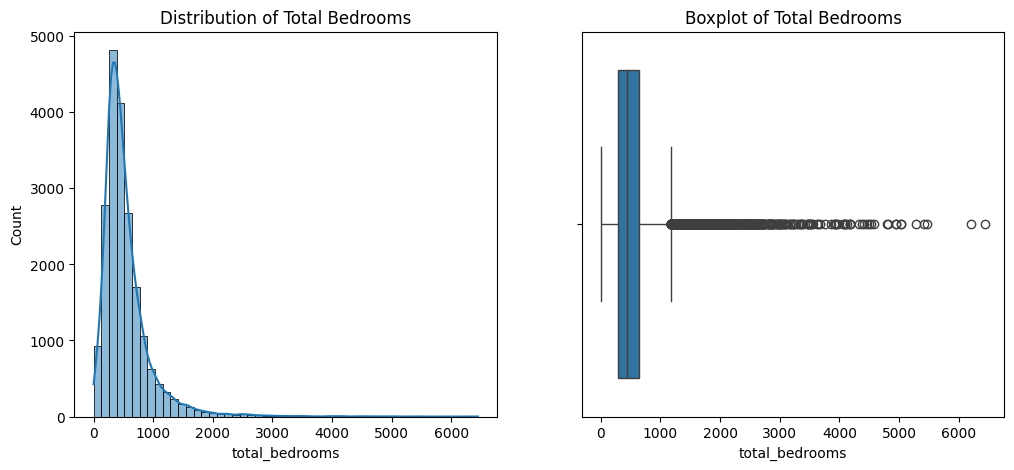

In [233]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['total_bedrooms'], bins=50, kde=True)
plt.title('Distribution of Total Bedrooms')

# Boxplot (Detect Outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_bedrooms'])
plt.title('Boxplot of Total Bedrooms')

plt.show()


# **Using the mean would pull values higher due to extreme outliers, so the median is the more robust choice.**

In [234]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [235]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# Handle Categorical Data

In [236]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [237]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Encoding Strategy

Since drop_first=True was used, one category (most likely <1H OCEAN) was dropped. That means our dataset only includes 4 features:

* ocean_proximity_INLAND
* ocean_proximity_ISLAND
* ocean_proximity_NEAR BAY
* ocean_proximity_NEAR OCEAN

In [238]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Verify encoding
print("Dataset after encoding:\n", df.head())
print("\nNew column names:\n", df.columns)

Dataset after encoding:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False           

# **Feature Scaling**

We'll use Standardization (Z-score scaling) since it's ideal for models like Linear Regression.

In [239]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features (excluding the target variable)
num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Verify Scaling
print("Summary after scaling:\n", df[num_features].describe())


Summary after scaling:
           longitude      latitude  housing_median_age   total_rooms  \
count  2.064000e+04  2.064000e+04        2.064000e+04  2.064000e+04   
mean  -8.526513e-15 -1.079584e-15        5.508083e-18  3.201573e-17   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -2.385992e+00 -1.447568e+00       -2.196180e+00 -1.207283e+00   
25%   -1.113209e+00 -7.967887e-01       -8.453931e-01 -5.445698e-01   
50%    5.389137e-01 -6.422871e-01        2.864572e-02 -2.332104e-01   
75%    7.784964e-01  9.729566e-01        6.643103e-01  2.348028e-01   
max    2.625280e+00  2.958068e+00        1.856182e+00  1.681558e+01   

       total_bedrooms    population    households  median_income  
count    2.064000e+04  2.064000e+04  2.064000e+04   2.064000e+04  
mean    -9.363741e-17 -1.101617e-17  6.885104e-17   6.609700e-17  
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00  
min     -1.277688e+00 -1.256123e+00 -1.303984e+00  -1.774299e+00  
2

To improve model performance, we applied **Z-score standardization** to numerical features.  
This ensures that all features have:
- **Mean = 0**
- **Standard Deviation = 1**

### **Summary Statistics After Scaling**
| Feature | Mean | Std Dev | Min | Max |
|---------|------|---------|-----|-----|
| longitude | ≈ 0 | 1 | -2.39 | 2.63 |
| latitude | ≈ 0 | 1 | -1.45 | 2.96 |
| housing_median_age | ≈ 0 | 1 | -2.20 | 1.86 |
| total_rooms | ≈ 0 | 1 | -1.21 | 16.82 |
| total_bedrooms | ≈ 0 | 1 | -1.28 | 14.09 |
| population | ≈ 0 | 1 | -1.26 | 30.25 |
| households | ≈ 0 | 1 | -1.30 | 14.60 |
| median_income | ≈ 0 | 1 | -1.77 | 5.86 |

### **Key Observations**
- **All features** are now standardized.
- This prevents models from being biased toward features with larger numerical ranges.



# **Identifying the Correlation Between Features and Target**

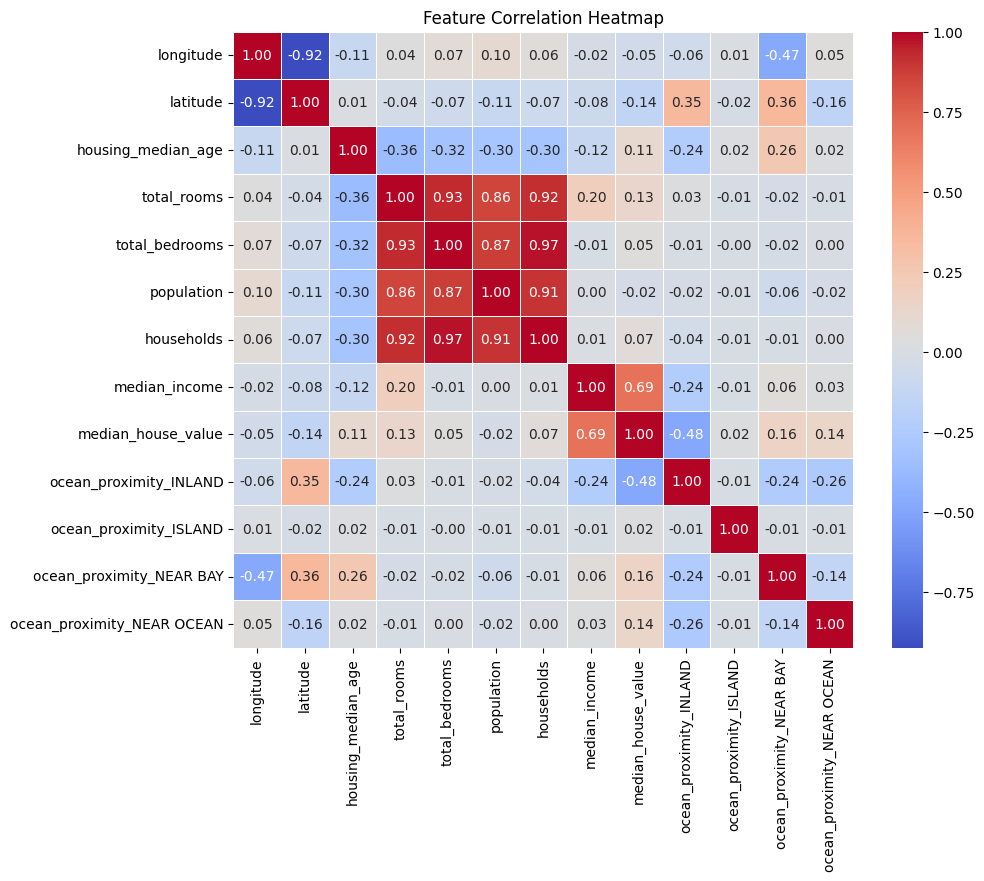

In [240]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlations with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [241]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.006158,-0.004322,-0.019667,0.000557
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006158,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


**Strong Positive Correlations**:


*   total_rooms & total_bedrooms (0.927): As expected, houses with more rooms tend to have more bedrooms
*   households & total_bedrooms (0.974): Areas with more households have more bedrooms in total
*   population & households (0.907): More populated areas have more households
*  median_income & median_house_value (0.688): Higher income areas have higher house values

**Strong Negative Correlations**:

* longitude & latitude (-0.925): This indicates the geographic shape of the area being studied
* longitude & ocean_proximity_NEAR BAY (-0.474): Western longitudes (smaller values) are more likely to be near the bay
* median_house_value & ocean_proximity_INLAND (-0.485): Inland properties tend to have lower values than coastal ones

**Multicollinearity (Strong Correlation Between Features):**

* total_rooms (0.92), total_bedrooms (0.97), households (0.91), and population (0.87) are highly correlated.
* This suggests redundancy—we don’t need all of them.


**Geographic Insights**:
* Properties near the bay tend to be in the western (longitude) and northern (latitude) parts of the region
* Inland properties tend to be in the northern areas (correlation of 0.351 with latitude)

# **Feature Engineering**

**Create New Features**

In [242]:
# Feature Engineering
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

Keeping Location Data:

Longitude & Latitude are critical because house prices strongly depend on geography.
The correlation analysis supports that latitude (-0.142 correlation) does impact house prices.

In [243]:
# Handling missing values
df.dropna(inplace=True)

In [244]:
# Ensure no negative values before log transformation
df["median_income"] = df["median_income"].clip(lower=1e-9)
df["population_per_household"] = df["population_per_household"].clip(lower=1e-9)

# Apply log transformation safely
df["log_median_income"] = np.log1p(df["median_income"])
df["log_population_per_household"] = np.log1p(df["population_per_household"])


In [245]:
# Selecting features to retain
selected_features = [
    "longitude", "latitude", "housing_median_age", "rooms_per_household",
    "bedrooms_per_room", "log_median_income", "log_population_per_household"
]
target = "median_house_value"

# **Splitting the Dataset**

In [246]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
scaler.fit(train_df[selected_features])

train_df[selected_features] = scaler.transform(train_df[selected_features])
test_df[selected_features] = scaler.transform(test_df[selected_features])


# **Model Training**

In [247]:
X_train = train_df[selected_features]
y_train = train_df[target]

X_test = test_df[selected_features]
y_test = test_df[target]

**Linear Regression Model**

In [248]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

**Evaluate Performance on Test Data**

In [250]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 5894550358.42308
R² Score: 0.5501747579342782


In [252]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R² Score: {r2_poly}")


Polynomial Regression Results:
Mean Squared Error: 5416748059.308902
R² Score: 0.5866368325268669


In [253]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R² Score: {r2_ridge}")


Ridge Regression Results:
Mean Squared Error: 5894619636.500055
R² Score: 0.5501694711819645


In [254]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R² Score: {r2_lasso}")


Lasso Regression Results:
Mean Squared Error: 5894550582.688677
R² Score: 0.5501747408201099


In [255]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Regression Results:
Mean Squared Error: 2534938430.464895
R² Score: 0.8065536429803914


In [256]:
results = {
    "Model": ["Polynomial Regression", "Ridge Regression", "Lasso Regression", "Random Forest"],
    "MSE": [mse_poly, mse_ridge, mse_lasso, mse_rf],
    "R² Score": [r2_poly, r2_ridge, r2_lasso, r2_rf]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                   Model           MSE  R² Score
0  Polynomial Regression  5.416748e+09  0.586637
1       Ridge Regression  5.894620e+09  0.550169
2       Lasso Regression  5.894551e+09  0.550175
3          Random Forest  2.534938e+09  0.806554
